### Climate Change: Earth Surface Temperature Data
Exploring global temperatures since 1750


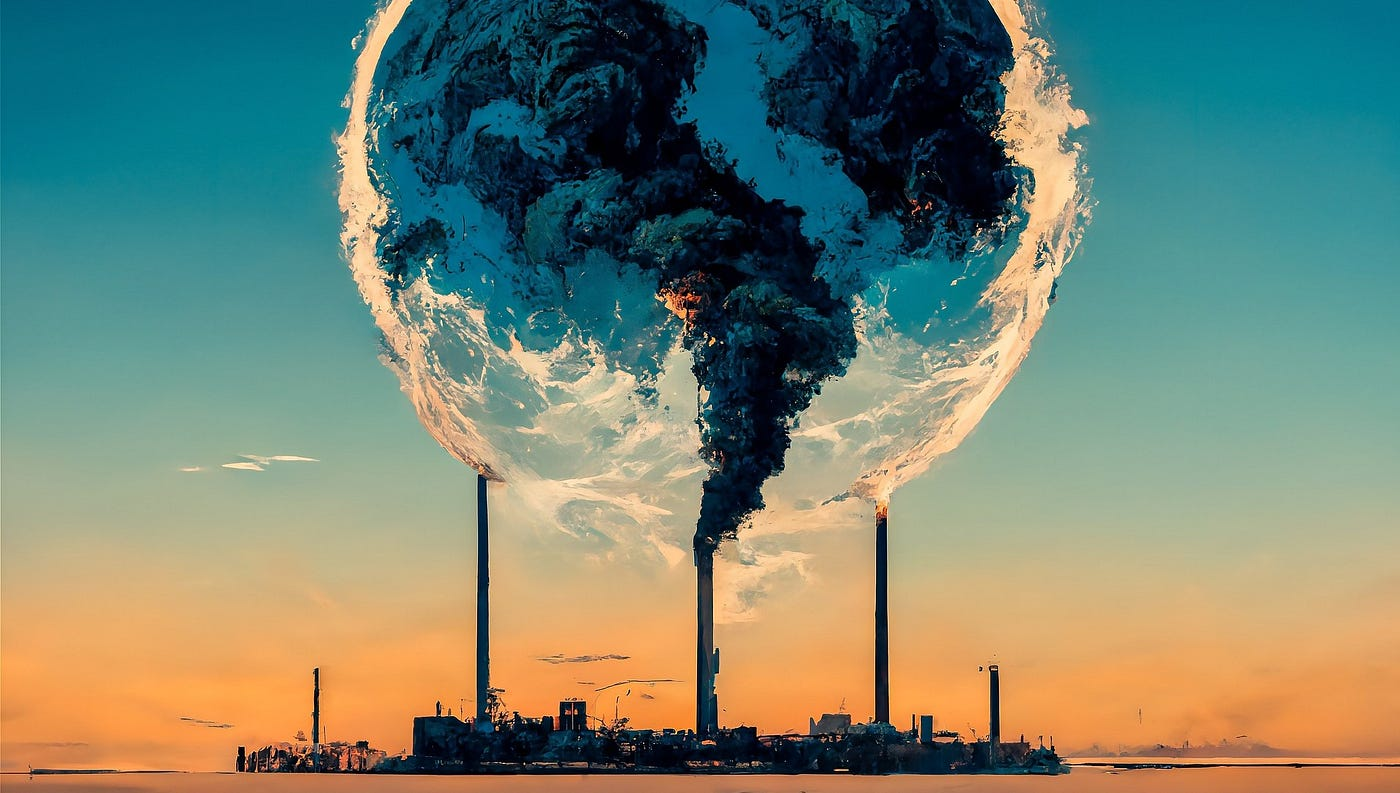

Analyzing long-term climate trends involves extensive data cleaning and preparation, particularly with datasets like the one featured on Kaggle. Historical climate data presents various challenges, including changes in measurement methods over time and the relocation of weather stations. For instance, early data collection involved mercury thermometers, where variations in visit times could affect measurements. Furthermore, airport construction in the 1940s led to the relocation of many weather stations, while the transition to electronic thermometers in the 1980s introduced potential biases.

To address these complexities, several organizations compile climate data, with NOAA's MLOST, NASA's GISTEMP, and the UK's HadCrut being the most prominent. A newer compilation from Berkeley Earth, affiliated with Lawrence Berkeley National Laboratory, offers a comprehensive dataset. The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 existing archives, facilitating detailed analysis, including by country.

Included in this dataset are various files, such as:

* Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv)
* Global Average Land Temperature by Country (GlobalLandTemperaturesByCountry.csv)
* Global Average Land Temperature by State (GlobalLandTemperaturesByState.csv)
* Global Land Temperatures By Major City (GlobalLandTemperaturesByMajorCity.csv)
* Global Land Temperatures By City (GlobalLandTemperaturesByCity.csv)
  
These files provide insights into temperature trends at different spatial scales, from global averages to specific countries, states, and cities. The data is sourced from [Berkeley Earth's data page](https://berkeleyearth.org/data/) ,offering transparency and reproducibility through published source data and transformation codes. Additionally, Berkeley Earth employs methods that allow inclusion of weather observations from shorter time series, minimizing data loss.

##### Metric of Success: Accuracy and Reliability of Climate Trend Analysis

### Load Data

In [1]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the datasets
#dataset1
data = pd.read_csv("GlobalTemperatures.csv")
data.head(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(3192, 9)

In [4]:
#check for datatypes
data.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [5]:
#check for duplicates 
data.duplicated().sum()

0

In [6]:
data.shape

(3192, 9)

In [7]:
#undestanding the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [8]:
#checking for null values
data.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [9]:
#replacing null values 
data.fillna(0, inplace=True)
data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,0.0,0.0,0.0,0.0,0.0,0.0
1,1750-02-01,3.083,3.702,0.0,0.0,0.0,0.0,0.0,0.0
2,1750-03-01,5.626,3.076,0.0,0.0,0.0,0.0,0.0,0.0
3,1750-04-01,8.490,2.451,0.0,0.0,0.0,0.0,0.0,0.0
4,1750-05-01,11.573,2.072,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data.describe().sum()

LandAverageTemperature                       3247.072252
LandAverageTemperatureUncertainty            3203.898073
LandMaxTemperature                           3256.119350
LandMaxTemperatureUncertainty                3197.617648
LandMinTemperature                           3206.230724
LandMinTemperatureUncertainty                3196.639120
LandAndOceanAverageTemperature               3256.221040
LandAndOceanAverageTemperatureUncertainty    3192.813392
dtype: float64

In [11]:
#loading dataset2
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
df.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [12]:
#check for the data types
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [13]:
df.shape

(577462, 4)

In [14]:
#checking for duplicates
df.duplicated().sum()

0

In [15]:
#understanding second dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [16]:
#checking for null values 
df.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [17]:
#replacing the null values
df.fillna(0, inplace=True)
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,0.000,0.000,Åland
2,1744-01-01,0.000,0.000,Åland
3,1744-02-01,0.000,0.000,Åland
4,1744-03-01,0.000,0.000,Åland


In [18]:
#loading dataset3
df1 = pd.read_csv("GlobalLandTemperaturesByCity.csv")
df1.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [19]:
#datatypes for the dataset
df1.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [20]:
df1.shape

(8599212, 7)

In [21]:
#checking for duplicates
df1.duplicated().sum()

0

In [22]:
#understanding the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [23]:
#checking for null values 
df1.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [24]:
#replacing the null values 
df1.fillna(0, inplace=True)
df1.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,0.000,0.000,Århus,Denmark,57.05N,10.33E
2,1744-01-01,0.000,0.000,Århus,Denmark,57.05N,10.33E


In [25]:
#loading dataset4 
df2 = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")
df2.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [26]:
#datatypes
df2.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [27]:
df2.shape

(239177, 7)

In [28]:
#duplicates checking
df2.duplicated().sum()

0

In [29]:
#checking for null values
df2.isnull().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [30]:
#replacing the null values
df2.fillna(0, inplace=True)
df2.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             239177 non-null  float64
 2   AverageTemperatureUncertainty  239177 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [32]:
#loading dataset5
df3 =pd.read_csv("GlobalLandTemperaturesByState.csv")
df3.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [33]:
#check datatypes
df3.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [34]:
#checking for any duplicates
df3.duplicated().sum()

0

In [35]:
df3.shape

(645675, 5)

In [36]:
#checking for all null values
df3.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [37]:
#replacing all the nullvalues 
df3.fillna(0, inplace=True)
df3.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [38]:
#understanding this dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             645675 non-null  float64
 2   AverageTemperatureUncertainty  645675 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


###### Merging 4 of the datasets : Merging Global Average Land Temp by country & State. Then the Global Land Temp by Major city & city for seamless work

In [39]:
#merged df1 &df2 with all common columns .ie. all of them
merged_df = pd.merge(df1, df2, on=['dt', 'AverageTemperature','AverageTemperatureUncertainty','City', 'Country', 'Latitude', 'Longitude'], how='inner')
merged_df.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [40]:
!pip install pyspark


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
# Check the initial data
print("merged_df:")
print(data.head())

merged_df['dt'] = pd.to_datetime(merged_df['dt'], errors='coerce')

# Extract the year from the datetime column
merged_df['Year'] = merged_df['dt'].dt.year

# Filtering the dataset to show data from 2000 to 2022
filtered_df = merged_df[(merged_df['Year'] >= 2000) & (merged_df['Year'] <= 2022)]

# Check the filtered data
filtered_df.head()


merged_df:
           dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 0.0                            0.0                 0.0   
1                 0.0                            0.0                 0.0   
2                 0.0                            0.0                 0.0   
3                 0.0                            0.0                 0.0   
4                 0.0                            0.0                 0.0   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0      

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
1711,2000-01-01,27.293,0.331,Abidjan,Côte D'Ivoire,5.63N,3.23W,2000
1712,2000-02-01,27.685,0.267,Abidjan,Côte D'Ivoire,5.63N,3.23W,2000
1713,2000-04-01,28.162,0.478,Abidjan,Côte D'Ivoire,5.63N,3.23W,2000
1714,2000-05-01,27.547,0.509,Abidjan,Côte D'Ivoire,5.63N,3.23W,2000
1715,2000-06-01,25.812,0.231,Abidjan,Côte D'Ivoire,5.63N,3.23W,2000


## EDA 

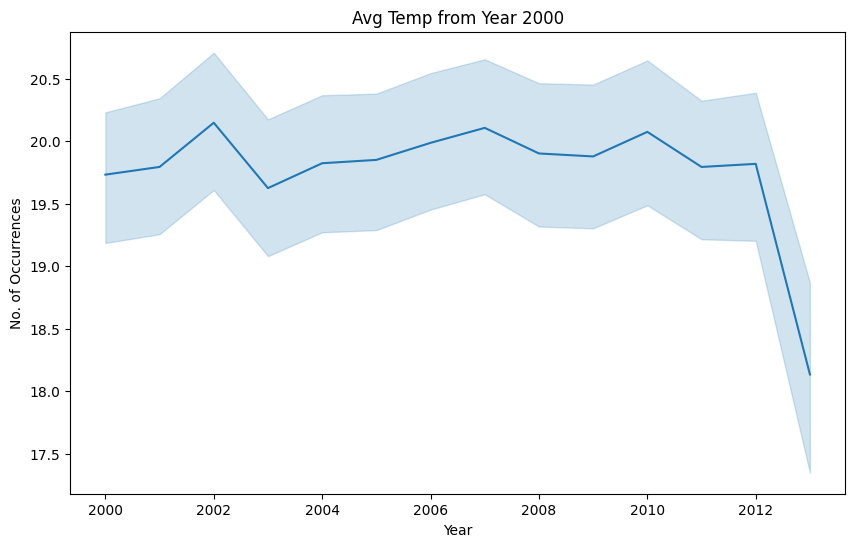

In [69]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='AverageTemperature', data=filtered_df)  # Replace 'column_name' with the actual column you want to plot

plt.title('Avg Temp from Year 2000')
plt.xlabel('Year')
plt.ylabel('No. of Occurrences')

plt.show();


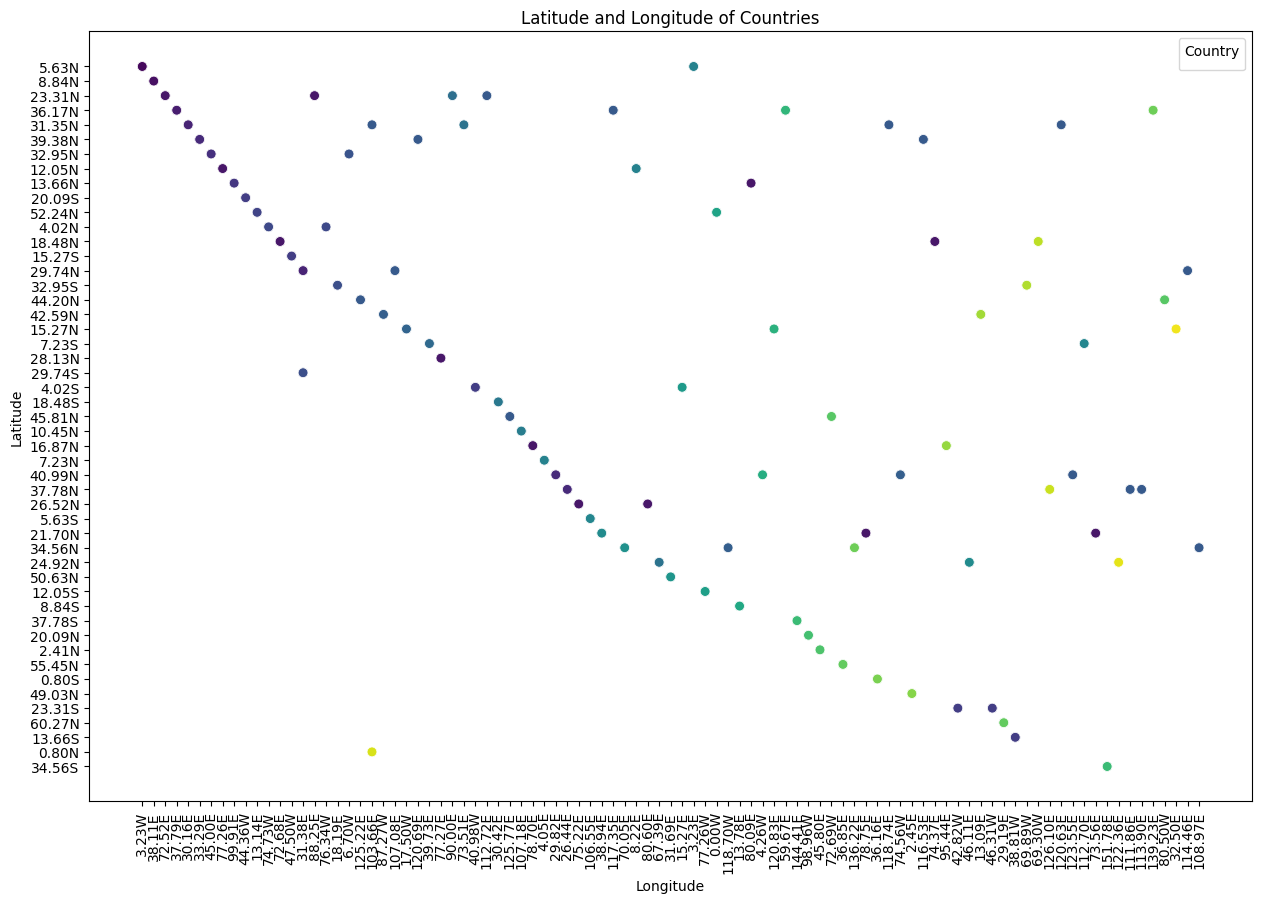

In [71]:
plt.figure(figsize=(15, 10))

scatter = sns.scatterplot(x='Longitude', y='Latitude', hue='Country', data=filtered_df, palette='viridis', legend=False, s=50)

plt.title('Latitude and Longitude of Countries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xticks(rotation=90)
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles[:20], labels[:20], loc='best', title='Country') 

plt.show()


In [ ]:
plt.figure(figsize=(22,6))
sns.lineplot(x=df.index, y=df['AverageTemperature'], label='Average Temperature')
sns.lineplot(x=df.index, y=df['Country'], label='Temperature Uncertainty')
plt.title('Global Land Temperatures By Country')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.xticks(rotation=45) 
plt.legend()
plt.show()